In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
df=pd.read_csv("Medical Cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
df['charges'].max()

63770.42801

In [10]:
df['charges'].min()

1121.8739

In [11]:
df.shape

(1338, 7)

<AxesSubplot:xlabel='age', ylabel='bmi'>

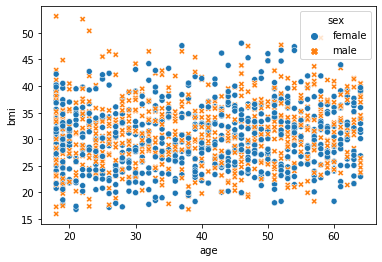

In [12]:
sns.scatterplot(data=df,x='age',y='bmi',hue='sex',style='sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

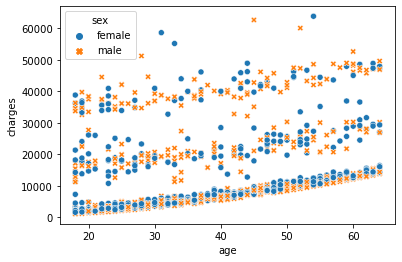

In [13]:
sns.scatterplot(data=df,x='age',y='charges',hue='sex',style='sex')

<AxesSubplot:xlabel='sex', ylabel='children'>

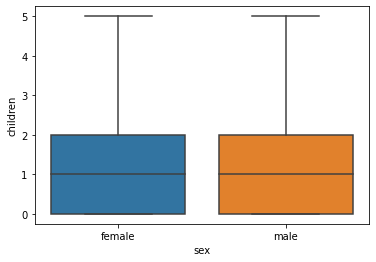

In [14]:
sns.boxplot(data=df,x='sex',y='children')

In [15]:
df=df[df['bmi']<47]

In [16]:
df.shape

(1329, 7)

In [17]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [18]:
from sklearn.preprocessing import LabelEncoder;
le=LabelEncoder()
def encoder(col):
    le.fit(col)
    print(col.name,le.classes_)
    return le.transform(col)
cols=['sex','smoker','region']


In [19]:
for name in cols:
    df[name]=encoder(df[name])

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


In [20]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


<AxesSubplot:>

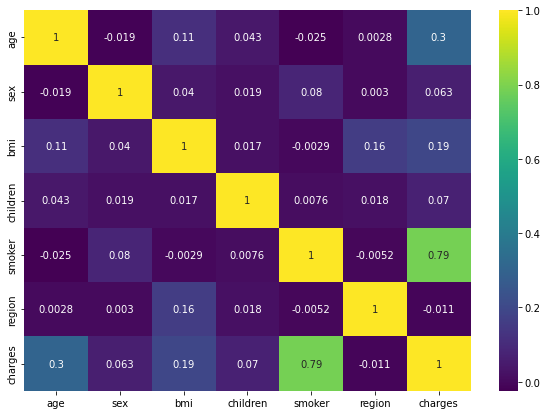

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [22]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.785912
age         0.302022
bmi         0.193196
children    0.069739
sex         0.063394
region     -0.010730
Name: charges, dtype: float64

In [23]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [24]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split;
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor;
clf=RandomForestRegressor(n_estimators=250,n_jobs=-1)
clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=250, n_jobs=-1)

In [27]:
clf.score(x_train,y_train),clf.score(x_test,y_test)

(0.9768587441093987, 0.8275890915711244)

In [28]:
y_pred=clf.predict(x_test)

In [29]:
from sklearn.metrics import mean_absolute_error;
mae=mean_absolute_error(y_test,y_pred)
mae

2704.8512938346935

In [30]:
import pickle;
pickle.dump(clf,open('model.pkl','wb'))